In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = web.DataReader('TCS.NS', data_source='yahoo',start='2012-01-01', end='2022-03-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,592.974976,576.500000,580.500000,589.299988,2248542.0,485.253113
2012-01-03,604.950012,590.000000,591.625000,598.799988,2708884.0,493.075867
2012-01-04,602.500000,584.650024,602.450012,586.500000,2386770.0,482.947540
2012-01-05,592.500000,583.674988,586.400024,586.000000,2547312.0,482.535767
2012-01-06,594.174988,578.400024,583.000000,584.700012,2119728.0,481.465240
...,...,...,...,...,...,...
2022-02-28,3563.750000,3455.899902,3490.000000,3554.199951,3288942.0,3554.199951
2022-03-02,3571.949951,3506.000000,3552.500000,3546.149902,2761341.0,3546.149902
2022-03-03,3578.600098,3530.100098,3562.850098,3544.399902,1928039.0,3544.399902


In [74]:
data = df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*.79)
training_data_len

1983

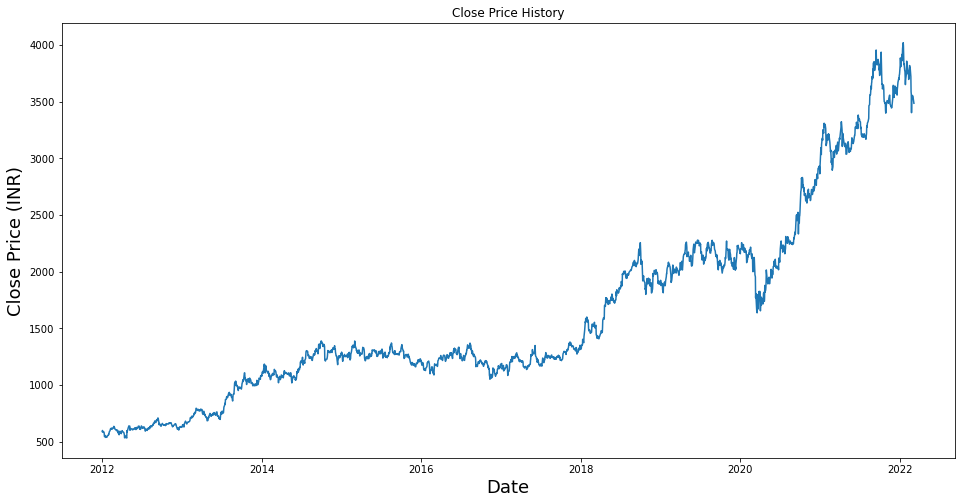

In [75]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.show()

In [76]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0163965 ],
       [0.01912088],
       [0.01559352],
       ...,
       [0.86385242],
       [0.85810259],
       [0.84678916]])

In [77]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.0163965 , 0.01912088, 0.01559352, 0.01545013, 0.01507733,
       0.01535693, 0.01450377, 0.01043153, 0.00362056, 0.00308286,
       0.006474  , 0.00569252, 0.00170633, 0.0016203 , 0.00218668,
       0.00192857, 0.00350585, 0.00483937, 0.0063808 , 0.00681096,
       0.00977194, 0.0092414 , 0.0120088 , 0.01538562, 0.01858317,
       0.01917824, 0.02228261, 0.02356593, 0.0242542 , 0.0231501 ,
       0.02233279, 0.02542998, 0.02309992, 0.02358744, 0.02477758,
       0.02697141, 0.02803967, 0.02950223, 0.02692841, 0.02327199,
       0.02261239, 0.02227543, 0.02193847, 0.02051176, 0.01975179,
       0.01843978, 0.020691  , 0.01789492, 0.01903485, 0.01294801,
       0.01426   , 0.01509884, 0.0082807 , 0.01012324, 0.01598784,
       0.01484073, 0.017264  , 0.01395889, 0.01584445, 0.01446075])]
[0.011033754178261579]



In [78]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [79]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1923, 60, 1)

In [80]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [81]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [82]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1923/1923 [==============================] - 30s 15ms/step - loss: 5.7690e-04


In [83]:
test_data = scaled_data[training_data_len-60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [84]:
x_test = np.array(x_test)

In [85]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [86]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [87]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

14.293664504366683

C:\Users\kapoo\AppData\Local\Temp/ipykernel_18156/3428246292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


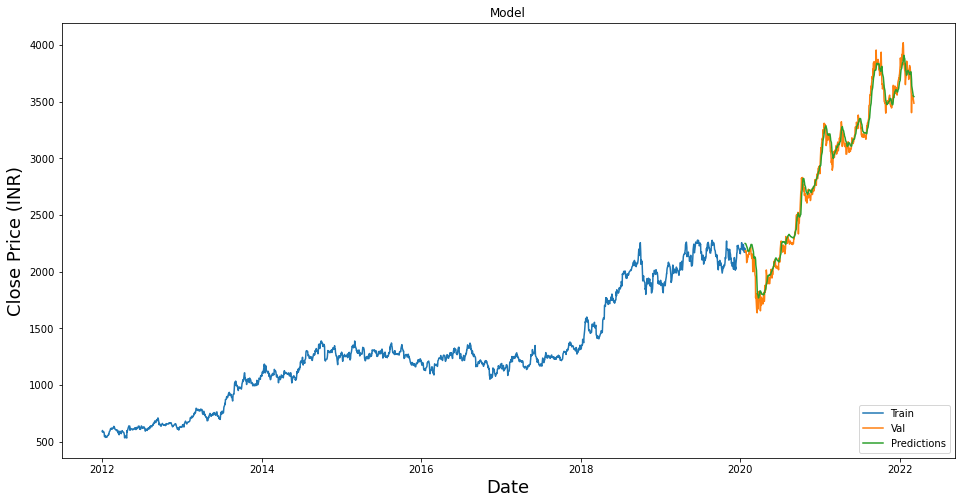

In [88]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (INR)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [89]:
valid

,Close,Predictions
Date,,
2020-01-24,2183.399902,2248.502197
2020-01-27,2169.250000,2245.138916
2020-01-28,2183.750000,2240.300049
2020-01-29,2154.600098,2237.257080
2020-01-30,2137.850098,2231.733398
...,...,...
2022-02-28,3554.199951,3598.186279
2022-03-02,3546.149902,3573.490479
2022-03-03,3544.399902,3558.455566


In [90]:
tcs_quote = web.DataReader('TCS.NS', data_source='yahoo',start='2012-01-01', end='2022-03-08')
new_df = tcs_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[3533.2297]]


In [91]:
tcs_quote2 = web.DataReader('TCS.NS', data_source='yahoo',start='2022-03-01', end='2022-03-08')
print(tcs_quote2['Close'])

Date
2022-03-02    3546.149902
2022-03-03    3544.399902
2022-03-04    3524.350098
2022-03-07    3484.899902
Name: Close, dtype: float64
